# Models:

In [1]:
# Libraries to import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, balanced_accuracy_score, plot_confusion_matrix, classification_report, f1_score


In [3]:
df = pd.read_csv('./Data/modeling.csv')

In [4]:
df.status_group = np.where(df['status_group'] == 'functional', 0, 1)

In [5]:
df.head()

,status_group,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_class,management,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded
0,0,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,Mundindi,109,True,VWC,Roman,0,1999,gravity,vwc,annually,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011
1,0,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,Natta,280,True,Other,Missing,1,2010,gravity,wug,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013
2,0,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,Ngorika,250,True,VWC,Nyumba ya mungu pipe scheme,1,2009,gravity,vwc,per bucket,soft,good,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2013
3,1,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,Nanyumbu,58,True,VWC,Missing,1,1986,submersible,vwc,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2013
4,0,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,Nyakasimbi,0,True,None,Missing,1,1997,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2011


In [6]:
scores = {}

# Class imbalance

There is some class imbalance problem that we can see. I decided to overcome this issue by using class_weight= balanced.

In [7]:
df.status_group.value_counts()

0    32259
1    27141
Name: status_group, dtype: int64

In [8]:
X = df.drop(columns = ['status_group', 'funder', 'installer', 'scheme_name', 'ward', 'lga'], axis=1)
Y = df['status_group']

In [9]:
Y.value_counts()

0    32259
1    27141
Name: status_group, dtype: int64

In [10]:
df['longitude'].value_counts()

34.077427    1812
32.984790       2
37.318911       2
39.098514       2
33.005032       2
             ... 
31.715232       1
36.871976       1
37.579803       1
33.196490       1
35.005922       1
Name: longitude, Length: 57516, dtype: int64

## Split the data into testing set and training set

We will split the data so that we can divide the training and test set separately. 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=1 )


In [12]:
X_train

,amount_tsh,gps_height,longitude,latitude,basin,region,district_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded
18495,0.0,1364,34.273043,-2.988290,Lake Victoria,Shinyanga,1,300,True,WUG,0,2009,handpump,wug,never pay,soft,good,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,2012
23396,0.0,1731,36.541604,-2.493953,Internal,Arusha,6,350,True,VWC,0,1997,gravity,vwc,on failure,soft,good,enough,unknown,other,unknown,cattle trough,cattle trough,2013
4666,0.0,348,38.895308,-10.596479,Ruvuma / Southern Coast,Mtwara,33,1,True,VWC,1,1980,gravity,vwc,never pay,soft,good,dry,spring,spring,groundwater,communal standpipe,communal standpipe,2013
59392,0.0,0,33.009440,-8.520888,Lake Rukwa,Mbeya,1,0,True,VWC,1,1997,gravity,vwc,never pay,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011
42160,0.0,0,32.467548,-3.878133,Lake Tanganyika,Shinyanga,3,0,True,None,1,1997,other,wug,unknown,milky,milky,enough,shallow well,shallow well,groundwater,other,other,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,10.0,1505,35.742164,-3.334206,Internal,Arusha,30,250,True,VWC,1,1998,gravity,vwc,per bucket,soft,good,enough,river,river/lake,surface,communal standpipe multiple,communal standpipe,2013
32511,0.0,1379,30.641622,-5.755746,Lake Tanganyika,Rukwa,1,140,True,Water authority,1,1986,other,water authority,never pay,soft,good,enough,machine dbh,borehole,groundwater,hand pump,hand pump,2013
5192,0.0,1852,36.677355,-3.281036,Pangani,Arusha,2,200,True,VWC,1,1990,gravity,vwc,never pay,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2013
12172,0.0,330,38.618804,-10.189132,Ruvuma / Southern Coast,Lindi,3,188,True,VWC,0,1972,other,vwc,never pay,unknown,unknown,dry,hand dtw,borehole,groundwater,communal standpipe multiple,communal standpipe,2013


In [13]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)


In [14]:
X_train

,amount_tsh,gps_height,longitude,latitude,district_code,population,public_meeting,permit,construction_year,year_recorded,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,scheme_management_Company,scheme_management_None,scheme_management_Other,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_SWC,scheme_management_Trust,scheme_management_VWC,scheme_management_WUA,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_company,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,payment_type_annually,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_dam,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
18495,0.0,1364,34.273043,-2.988290,1,300,True,0,2009,2012,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
23396,0.0,1731,36.541604,-2.493953,6,350,True,0,1997,2013,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4666,0.0,348,38.895308,-10.596479,33,1,True,1,1980,2013,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
59392,0.0,0,33.009440,-8.520888,1,0,True,1,1997,2011,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
42160,0.0,0,32.467548,-3.878133,3,0,True,1,1997,2012,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

   ## OneHotEncoder

We will be using OneHotEncoder for our categorical features to numerical array

In [15]:
df

,status_group,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_class,management,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded
0,0,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,Mundindi,109,True,VWC,Roman,0,1999,gravity,vwc,annually,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011
1,0,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,Natta,280,True,Other,Missing,1,2010,gravity,wug,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013
2,0,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,Ngorika,250,True,VWC,Nyumba ya mungu pipe scheme,1,2009,gravity,vwc,per bucket,soft,good,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2013
3,1,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,Nanyumbu,58,True,VWC,Missing,1,1986,submersible,vwc,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2013
4,0,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,Nyakasimbi,0,True,None,Missing,1,1997,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,0,10.0,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,5,Hai,Masama Magharibi,125,True,Water Board,Losaa Kia water supply,1,1999,gravity,water board,per bucket,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2013
59396,0,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,4,Njombe,Ikondo,56,True,VWC,Ikondo electrical water sch,1,1996,gravity,vwc,annually,soft,good,enough,river,river/lake,surface,communal standpipe,communal standpipe,2011
59397,0,0.0,Missing,0,Missing,34.017087,-8.750434,Rufiji,Mbeya,7,Mbarali,Chimala,0,True,VWC,Missing,0,1997,handpump,vwc,monthly,fluoride,fluoride,enough,machine dbh,borehole,groundwater,hand pump,hand pump,2011
59398,0,0.0,Malec,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,4,Chamwino,Mvumi Makulu,0,True,VWC,Missing,1,1997,handpump,vwc,never pay,soft,good,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,2011


In [16]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder.
# encoder = OneHotEncoder(handle_unknown="ignore")
# encoder.fit(X_train)

# Apply the encoder.
# X_train = encoder.transform(X_train)
# X_test = encoder.transform(X_test)


## Feature Selection with SELECTKBEST

In [17]:
# len(selector.get_support())

In [18]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

selector = SelectKBest(k=50)

selector.fit(X_train, y_train)

SelectKBest(k=50)

In [19]:
selected_columns = X_train.columns[selector.get_support()]
X_train[selected_columns]

,gps_height,district_code,public_meeting,construction_year,basin_Lake Nyasa,basin_Lake Rukwa,basin_Rufiji,basin_Ruvuma / Southern Coast,region_Arusha,region_Iringa,region_Lindi,region_Mtwara,scheme_management_VWC,scheme_management_WUA,scheme_management_Water Board,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,management_private operator,management_vwc,management_water board,management_wua,payment_type_annually,payment_type_monthly,payment_type_never pay,payment_type_per bucket,payment_type_unknown,water_quality_salty,water_quality_soft,water_quality_unknown,quality_group_good,quality_group_salty,quality_group_unknown,quantity_dry,quantity_enough,quantity_unknown,source_lake,source_machine dbh,source_shallow well,source_spring,source_type_shallow well,source_type_spring,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_hand pump,waterpoint_type_other,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_other
18495,1364,1,True,2009,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
23396,1731,6,True,1997,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4666,348,33,True,1980,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0
59392,0,1,True,1997,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0
42160,0,3,True,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,1505,30,True,1998,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
32511,1379,1,True,1986,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
5192,1852,2,True,1990,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0
12172,330,3,True,1972,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [20]:
len(X.columns)

24

## Dummy Classifier:

In [21]:
from sklearn.dummy import DummyClassifier
dummyc = DummyClassifier()
dummyc.fit(X_train[selected_columns], y_train)
y_pred = dummyc.predict(X_test)
f1_scores = f1_score(y_test, y_pred)

recall_scores = recall_score(y_test, y_pred)
print('Test recall score: ', recall_scores)
print('Test f1 score: ', f1_scores)

scores['baseline'] = (recall_scores, f1_scores)

Test recall score:  0.45760965557845157
Test f1 score:  0.45720588235294113


/opt/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


## Logistic Regression Model:

In [22]:
# params={'penalty':['l1','l2',None],'C':[.01,.1,.5,1],'solver':['liblinear','saga'], 'max_iter':[100,250,500],'l1_ratio':[.01,.1,.25,.5,1]}

In [23]:
best_params = {
    'C': [1],
    'l1_ratio': [0.01],
    'max_iter': [100],
    'penalty': ['l2'],
    'solver': ['liblinear']
}


In [24]:
lr_test = LogisticRegression(class_weight='balanced', random_state=1, tol = 0.0001)


In [25]:
len(X_train.columns)


130

In [26]:
#from sklearn.feature_selection import SelectFromModel
#sfm = SelectFromModel(lr_test)
#sfm.fit(X_train,y_train)
#selected = X.columns[sfm.get_support()]
#selected_columns = X.columns[selector.get_support()]


In [27]:
lr_test_grid = GridSearchCV(lr_test, param_grid=best_params ,scoring='recall' ,n_jobs=-1, cv=3, verbose=1)


In [28]:
lr_test_grid.fit(X_train[selected_columns],y_train)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.1s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=1),
             n_jobs=-1,
             param_grid={'C': [1], 'l1_ratio': [0.01], 'max_iter': [100],
                         'penalty': ['l2'], 'solver': ['liblinear']},
             scoring='recall', verbose=1)

In [29]:
lr_test_grid.best_score_


0.6359171646743099

In [30]:
lr_test_grid.best_estimator_


LogisticRegression(C=1, class_weight='balanced', l1_ratio=0.01, random_state=1,
                   solver='liblinear')

In [31]:
X_train

,amount_tsh,gps_height,longitude,latitude,district_code,population,public_meeting,permit,construction_year,year_recorded,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,scheme_management_Company,scheme_management_None,scheme_management_Other,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_SWC,scheme_management_Trust,scheme_management_VWC,scheme_management_WUA,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_company,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,payment_type_annually,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_dam,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
18495,0.0,1364,34.273043,-2.988290,1,300,True,0,2009,2012,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
23396,0.0,1731,36.541604,-2.493953,6,350,True,0,1997,2013,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4666,0.0,348,38.895308,-10.596479,33,1,True,1,1980,2013,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
59392,0.0,0,33.009440,-8.520888,1,0,True,1,1997,2011,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
42160,0.0,0,32.467548,-3.878133,3,0,True,1,1997,2012,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [32]:
lr_test_grid.best_params_

{'C': 1,
 'l1_ratio': 0.01,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [33]:
# Logistic Regression performance on the test set
y_pred = lr_test_grid.predict(X_test[selected_columns])    
recall_scores = recall_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred)

print('Test recall score: ', recall_scores)
print('Test f1 score: ', recall_scores)

scores['log_reg'] = (recall_scores, f1_scores)
print(classification_report(y_test, y_pred))

Test recall score:  0.6270238445687372
Test f1 score:  0.6270238445687372
              precision    recall  f1-score   support

           0       0.72      0.82      0.77      8056
           1       0.75      0.63      0.68      6794

    accuracy                           0.73     14850
   macro avg       0.74      0.72      0.73     14850
weighted avg       0.73      0.73      0.73     14850



In [34]:
scores

{'baseline': (0.45760965557845157, 0.45720588235294113),
 'log_reg': (0.6270238445687372, 0.6821457165732586)}

In [35]:
recall_scores1 = recall_score(y_test, y_pred)
recall_scores1

0.6270238445687372

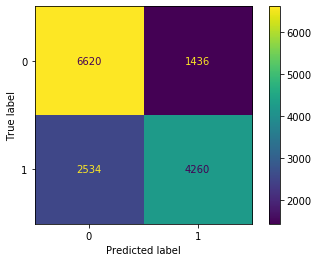

In [36]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr_test_grid, X_test[selected_columns], y_test)

In [37]:
final_model = lr_test_grid.best_estimator_

In [38]:
Y.value_counts()

0    32259
1    27141
Name: status_group, dtype: int64

In [39]:
final_model.coef_[0]

array([ 2.39591484e-05, -2.17060942e-03, -5.58995904e-01, -1.05773285e-03,
       -6.67738568e-01,  6.94412653e-01,  8.14683799e-02, -9.59218643e-03,
       -5.57547900e-01, -9.47203459e-01,  5.69737546e-01,  5.38849715e-01,
       -2.20675716e-01, -4.44256031e-01, -1.01855386e+00, -1.53024847e-02,
       -8.14376486e-01,  1.48817257e-01,  4.94951246e-01, -9.41124584e-01,
        5.06141147e-01,  4.88996316e-01,  4.46180424e-01, -4.58165193e-01,
       -9.05688901e-02,  3.91394910e-01, -6.83517994e-01,  3.23459926e-01,
       -7.25931506e-01,  2.99322212e-01,  4.82219521e-01,  2.99322212e-01,
        1.42775204e+00,  4.82219521e-01,  3.81744923e+00, -3.77880082e-01,
        4.07500668e-01,  7.97106863e-01,  2.32794223e-01,  5.19615974e-02,
       -8.93189957e-02,  5.19615974e-02, -8.93189957e-02,  5.02785163e-02,
        8.25855377e-01,  5.59115952e-01,  1.19198807e+00,  8.76133893e-01,
        5.59115952e-01,  1.19198807e+00])

In [40]:
X.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'basin', 'region',
       'district_code', 'population', 'public_meeting', 'scheme_management',
       'permit', 'construction_year', 'extraction_type_class', 'management',
       'payment_type', 'water_quality', 'quality_group', 'quantity', 'source',
       'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'year_recorded'],
      dtype='object')

#note: come up with two insights from analyzing model (features)
ex: logistic regression -> 
    
    
future: problems that may need to be repaired
    

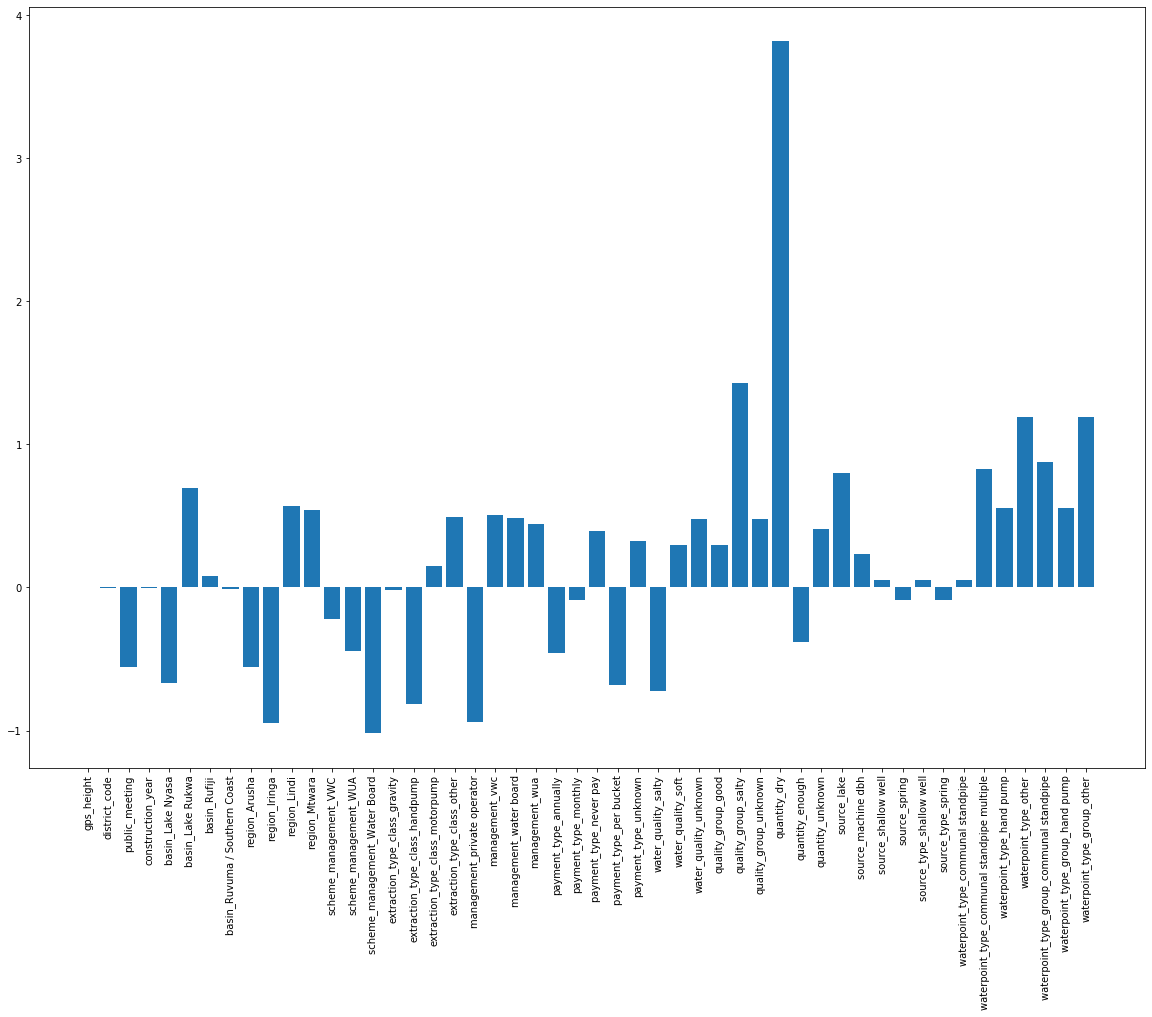

In [41]:
fig, ax = plt.subplots(figsize=(20, 14))
ax.bar(x=X_train[selected_columns].columns, height=final_model.coef_[0]);
ax.set_xticklabels(labels=X_train[selected_columns].columns, rotation=90);

## KNN:

In [42]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=1 )


For KNN, I need to standarize by scaling the data

In [43]:

from sklearn.preprocessing import StandardScaler

scale = StandardScaler(with_mean=False)
X_train_knn = scale.fit_transform(X_train[selected_columns])
X_test_knn = scale.transform(X_test[selected_columns])

X_train_knn= scale.fit_transform(X_train)

In [44]:
knn = KNeighborsClassifier()
params_t = {'n_neighbors':range(5,11)}
knn.get_params().keys()


dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [45]:
best_params = {
    'n_neighbors': [10], 
}

knn = KNeighborsClassifier(weights='distance') 
knn_grid = GridSearchCV(knn, best_params, cv = 3, scoring = 'recall', verbose = 1, n_jobs = -1)
knn_grid.fit(X_train[selected_columns], y_train)
print(knn_grid.best_params_, ': ', knn_grid.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.4s finished


{'n_neighbors': 10} :  0.6030375955501014


In [46]:
knn_grid.best_params_

{'n_neighbors': 10}

In [47]:
knn_grid.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=3, estimator=KNeighborsClassifier(weights='distance'),
             n_jobs=-1, param_grid={'n_neighbors': [10]}, scoring='recall',
             verbose=1)>

In [48]:
y_pred = knn_grid.predict(X_test[selected_columns])    
recall_scores = recall_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred)

print('Test recall score: ', recall_scores)
print('Test f1 score: ', f1_scores)

scores['knn_gsc'] = (recall_scores, f1_scores)
print(classification_report(y_test, y_pred))

Test recall score:  0.6146599941124522
Test f1 score:  0.6700361010830326
              precision    recall  f1-score   support

           0       0.71      0.81      0.76      8056
           1       0.74      0.61      0.67      6794

    accuracy                           0.72     14850
   macro avg       0.73      0.71      0.72     14850
weighted avg       0.72      0.72      0.72     14850



In [49]:
scores

{'baseline': (0.45760965557845157, 0.45720588235294113),
 'log_reg': (0.6270238445687372, 0.6821457165732586),
 'knn_gsc': (0.6146599941124522, 0.6700361010830326)}

## Decision Trees:

In [50]:
dt_clf=DecisionTreeClassifier(class_weight='balanced')
params_dt={'criterion':['gini','entropy'],'max_depth':[6],'min_samples_leaf':[6, 8, 10, 12]}

In [51]:
dt_grid=GridSearchCV(dt_clf,params_dt,cv=3,verbose=1,n_jobs=-1,scoring='recall')


In [52]:
dt_grid.fit(X_train[selected_columns],y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.8s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [6],
                         'min_samples_leaf': [6, 8, 10, 12]},
             scoring='recall', verbose=1)

In [53]:
dt_grid.best_params_


{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}

In [54]:
dt_grid.best_score_


0.5013998790988144

In [55]:
y_pred_dt = dt_grid.best_estimator_.predict(X_test[selected_columns])
# f1_dt=metrics.recall_score(y_test,y_pred_dt)
y_pred_dt

array([0, 0, 0, ..., 1, 0, 1])

In [56]:
recall_dt = metrics.recall_score(y_test,y_pred_dt)
recall_dt

0.5086841330585811

In [57]:
# Decision Tree performance on the test set
y_pred = dt_grid.predict(X_test[selected_columns])    
recall_test = recall_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred)

print('Test recall score: ', recall_test)

print('Test f1 score: ', f1_scores)
scores['dt_grid'] = (recall_test, f1_scores)
print(classification_report(y_test, y_pred))

Test recall score:  0.5086841330585811
Test f1 score:  0.6332569857993586
              precision    recall  f1-score   support

           0       0.69      0.92      0.79      8056
           1       0.84      0.51      0.63      6794

    accuracy                           0.73     14850
   macro avg       0.76      0.71      0.71     14850
weighted avg       0.76      0.73      0.72     14850



In [58]:
scores

{'baseline': (0.45760965557845157, 0.45720588235294113),
 'log_reg': (0.6270238445687372, 0.6821457165732586),
 'knn_gsc': (0.6146599941124522, 0.6700361010830326),
 'dt_grid': (0.5086841330585811, 0.6332569857993586)}

## Random Forest:

In [115]:
rf_cls=RandomForestClassifier(class_weight='balanced')


In [116]:
params_rf={'n_estimators':[500],'criterion':['gini', 'entropy'],
           'max_depth':[20],'min_samples_leaf':[2],'max_leaf_nodes':[85, 100], 'max_features':[35, 50], 
           'warm_start': [True, False] }

In [117]:
grid_forest=GridSearchCV(rf_cls,params_rf, scoring='recall', cv=5, verbose=1, n_jobs=-1)


In [118]:
grid_forest.fit(X_train[selected_columns],y_train)
# {'high':200,'low':1}

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 15.6min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [20],
                         'max_features': [35, 50], 'max_leaf_nodes': [85, 100],
                         'min_samples_leaf': [2], 'n_estimators': [500],
                         'warm_start': [True, False]},
             scoring='recall', verbose=1)

In [119]:
grid_forest.best_estimator_


RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=50,
                       max_leaf_nodes=100, min_samples_leaf=2, n_estimators=500,
                       warm_start=True)

In [120]:
grid_forest.best_params_


{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 50,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 2,
 'n_estimators': 500,
 'warm_start': True}

In [121]:
grid_forest.best_score_


0.6725319685064094

In [122]:
# Random Forest performance on the test set
y_pred = grid_forest.predict(X_test[selected_columns])    
recall_test = recall_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred)

print('Test recall score: ', recall_test)
print('Test f1 score: ', f1_scores)

scores['rf_grid'] = (recall_test, f1_scores)
print(classification_report(y_test, y_pred))

Test recall score:  0.6619075654989697
Test f1 score:  0.7233974101182338
              precision    recall  f1-score   support

           0       0.75      0.86      0.80      8056
           1       0.80      0.66      0.72      6794

    accuracy                           0.77     14850
   macro avg       0.77      0.76      0.76     14850
weighted avg       0.77      0.77      0.77     14850



In [123]:
scores

{'baseline': (0.45760965557845157, 0.45720588235294113),
 'log_reg': (0.6270238445687372, 0.6821457165732586),
 'knn_gsc': (0.6146599941124522, 0.6700361010830326),
 'dt_grid': (0.5086841330585811, 0.6332569857993586),
 'rf_grid': (0.6619075654989697, 0.7233974101182338),
 'voting': (0.6455696202531646, 0.7229868952443748)}

In [124]:
final_model_rf = grid_forest.best_estimator_


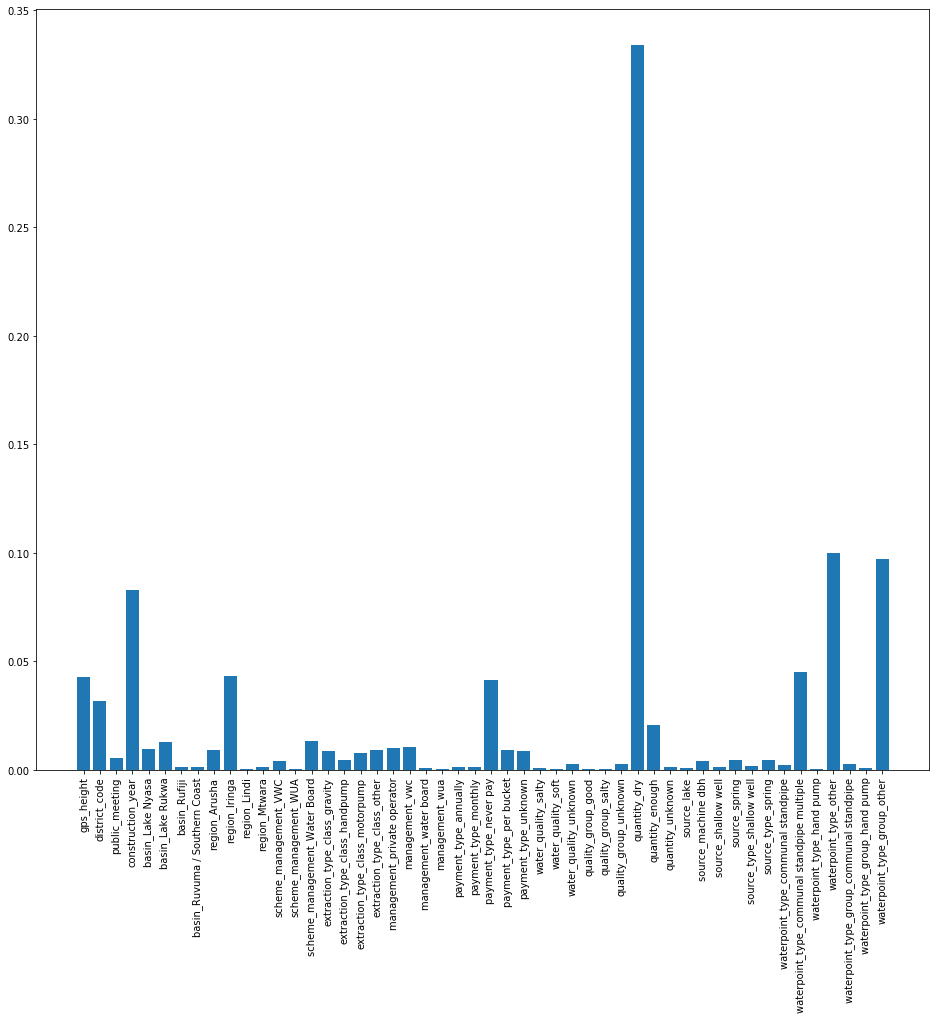

In [129]:
fig, ax = plt.subplots(figsize=(16, 14))
ax.bar(x=X_train[selected_columns].columns, height=final_model_rf.feature_importances_);
ax.set_xticklabels(labels=X_train[selected_columns].columns, rotation=90);
plt.savefig('./plots/important_features.png', bbox_inches='tight')


In [126]:
final_model_rf.feature_importances_.max()

0.3340719750552837

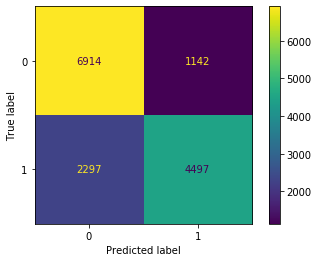

In [128]:
plot_confusion_matrix(grid_forest, X_test[selected_columns], y_test)
plt.savefig('./plots/matrix.png', bbox_inches='tight')


Accuracy = (TP+TN)/(TP+TN+FP+FN)
Precision = (TP/ float(TP+FP))
Recall = (TP/ float(TP+FN))
F1 = 2*Precision*Recall / (Precision+Recall)

print('Accuracy Score', Accuracy)
print('Precision Score', Precision)
print('Recall Score', Recall)
print('F1 Score', F1)

In [72]:
# Organization will be looking at wells currently in place and what might be breaking ?
 # - features that are related to 
# we got accurate after model
# after model, find relationships of features and functionality of wells? 
# selectpoly of interactions selectkbest(k=20) -> see one feature over over again.

In [73]:
# - need repair or not create a new column 

In [74]:
# if i could predict accurate predict and how would we use that model and who would use it.
# if possible you want to
# these types of wells break more often, provide villages with water, when they break peopel dont have water?

In [75]:
# recall is true positive / how many times it was true
# positive - need repair
# minimizing false negative -> functional but need repair
# false positive -> need repair but functional

## Voting Classifier

In [102]:
lr=lr_test_grid.best_estimator_
rf=grid_forest.best_estimator_
knn=knn_grid.best_estimator_
dt=dt_grid.best_estimator_


In [103]:
voting_clf=VotingClassifier(estimators=[('logreg',lr),('randomforest',rf), ('dt', dt),('knn', knn)],voting='soft')

In [104]:
voting_clf.fit(X_train[selected_columns],y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1, class_weight='balanced',
                                                 l1_ratio=0.01, random_state=1,
                                                 solver='liblinear')),
                             ('randomforest',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=20,
                                                     max_features=20,
                                                     max_leaf_nodes=100,
                                                     min_samples_leaf=2,
                                                     n_estimators=500)),
                             ('dt',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=6,
                                                     min_samples_leaf=

In [105]:
y_train_pred=voting_clf.predict(X_train[selected_columns])
y_test_pred=voting_clf.predict(X_test[selected_columns])

In [106]:
y_test_pred

array([0, 0, 0, ..., 1, 0, 1])

In [107]:
recall_score_train=recall_score(y_train,y_train_pred)
recall_score_test=recall_score(y_test,y_test_pred)

In [108]:
recall_score_train

0.8202191969332088

In [109]:
recall_score_test

0.6455696202531646

In [110]:
f1_scores = f1_score(y_test, y_test_pred)


In [111]:
scores['voting'] = (recall_score_test, f1_scores)

In [112]:
scores

{'baseline': (0.45760965557845157, 0.45720588235294113),
 'log_reg': (0.6270238445687372, 0.6821457165732586),
 'knn_gsc': (0.6146599941124522, 0.6700361010830326),
 'dt_grid': (0.5086841330585811, 0.6332569857993586),
 'rf_grid': (0.6499852811304092, 0.7202152817418251),
 'voting': (0.6455696202531646, 0.7229868952443748)}

In [113]:
voting_clf.named_estimators


{'logreg': LogisticRegression(C=1, class_weight='balanced', l1_ratio=0.01, random_state=1,
                    solver='liblinear'),
 'randomforest': RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=20,
                        max_leaf_nodes=100, min_samples_leaf=2,
                        n_estimators=500),
 'dt': DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                        min_samples_leaf=10),
 'knn': KNeighborsClassifier(n_neighbors=10, weights='distance')}

# ADA BOOSTING

In [183]:
from sklearn.ensemble import AdaBoostClassifier

In [186]:
ada1 = AdaBoostClassifier(base_estimator = final_model_rf,learning_rate=1,n_estimators=10)
ada1.fit(X_final_test,Y_final_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distri

AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                         max_depth=20,
                                                         max_features=50,
                                                         max_leaf_nodes=100,
                                                         min_samples_leaf=2,
                                                         n_estimators=500,
                                                         warm_start=True),
                   learning_rate=1, n_estimators=10)

## Fit to Final Model 

In [162]:
final_df = pd.read_csv('./Data/modeling.csv')

In [163]:
final_df

,status_group,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_class,management,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded
0,functional,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,Mundindi,109,True,VWC,Roman,0,1999,gravity,vwc,annually,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011
1,functional,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,Natta,280,True,Other,Missing,1,2010,gravity,wug,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013
2,functional,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,Ngorika,250,True,VWC,Nyumba ya mungu pipe scheme,1,2009,gravity,vwc,per bucket,soft,good,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2013
3,need repair,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,Nanyumbu,58,True,VWC,Missing,1,1986,submersible,vwc,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2013
4,functional,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,Nyakasimbi,0,True,None,Missing,1,1997,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,functional,10.0,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,5,Hai,Masama Magharibi,125,True,Water Board,Losaa Kia water supply,1,1999,gravity,water board,per bucket,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2013
59396,functional,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,4,Njombe,Ikondo,56,True,VWC,Ikondo electrical water sch,1,1996,gravity,vwc,annually,soft,good,enough,river,river/lake,surface,communal standpipe,communal standpipe,2011
59397,functional,0.0,Missing,0,Missing,34.017087,-8.750434,Rufiji,Mbeya,7,Mbarali,Chimala,0,True,VWC,Missing,0,1997,handpump,vwc,monthly,fluoride,fluoride,enough,machine dbh,borehole,groundwater,hand pump,hand pump,2011
59398,functional,0.0,Malec,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,4,Chamwino,Mvumi Makulu,0,True,VWC,Missing,1,1997,handpump,vwc,never pay,soft,good,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,2011


In [164]:
final_df.status_group = np.where(new_df['status_group'] == 'functional', 0, 1)

In [165]:
final_model_rf

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=50,
                       max_leaf_nodes=100, min_samples_leaf=2, n_estimators=500,
                       warm_start=True)

In [166]:
final_model_rf.feature_importances_

array([4.28446713e-02, 3.15584856e-02, 5.59291263e-03, 8.30648337e-02,
       9.76256383e-03, 1.27802823e-02, 1.29790628e-03, 1.24649045e-03,
       9.35267219e-03, 4.33838055e-02, 4.66121169e-04, 1.06665053e-03,
       3.91763066e-03, 4.62022577e-04, 1.32723934e-02, 8.48248571e-03,
       4.67371820e-03, 7.60537363e-03, 9.06303033e-03, 9.95311771e-03,
       1.05639035e-02, 6.72899357e-04, 2.34329520e-04, 1.12781020e-03,
       1.10635214e-03, 4.11978628e-02, 9.23087206e-03, 8.52029039e-03,
       7.30628290e-04, 5.16825818e-04, 2.58362681e-03, 5.18290822e-04,
       5.64751615e-04, 2.63687018e-03, 3.34071975e-01, 2.06011955e-02,
       1.42258045e-03, 6.51286764e-04, 3.98139853e-03, 1.51998546e-03,
       4.46679764e-03, 1.53087564e-03, 4.35967777e-03, 2.05846181e-03,
       4.48481462e-02, 5.84067892e-04, 9.97775787e-02, 2.44688121e-03,
       6.87127560e-04, 9.69394827e-02])

In [167]:
X_final_test = final_df.drop(columns=['status_group'], axis=1)

In [168]:
Y_final_test = final_df['status_group']

In [169]:
X_final_test = pd.get_dummies(X_final_test)


In [170]:
selector = SelectKBest(k=50)

selector.fit(X_final_test, Y_final_test)

SelectKBest(k=50)

In [171]:
selected_columns = X_final_test.columns[selector.get_support()]
X_final_test[selected_columns]

,gps_height,public_meeting,construction_year,funder_Germany Republi,funder_Government Of Tanzania,funder_Private Individual,installer_CES,installer_Government,installer_RWE,basin_Lake Nyasa,basin_Rufiji,basin_Ruvuma / Southern Coast,region_Arusha,region_Iringa,region_Lindi,region_Mtwara,lga_Hai,lga_Makete,lga_Njombe,lga_Siha,scheme_management_VWC,scheme_management_Water Board,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,management_private operator,management_vwc,management_water board,payment_type_annually,payment_type_monthly,payment_type_never pay,payment_type_per bucket,payment_type_unknown,water_quality_soft,water_quality_unknown,quality_group_good,quality_group_unknown,quantity_dry,quantity_enough,source_lake,source_spring,source_type_spring,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_hand pump,waterpoint_type_other,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_other
0,1390,True,1999,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0
1,1399,True,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
2,686,True,2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
3,263,True,1986,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
4,0,True,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,1210,True,1999,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0
59396,1212,True,1996,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
59397,0,True,1997,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
59398,0,True,1997,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [172]:
final_model_rf.fit(X_final_test[selected_columns], Y_final_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:368: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=50,
                       max_leaf_nodes=100, min_samples_leaf=2, n_estimators=500,
                       warm_start=True)

In [173]:
Y_pred = final_model_rf.predict(X_final_test[selected_columns])

In [174]:
Y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [175]:
final_recall = recall_score(Y_final_test, Y_pred)

In [176]:
final_f1 = f1_score(Y_final_test, Y_pred)

In [177]:
output = {
    'recall': final_recall,
    'f1': final_f1
}

In [178]:
output

{'recall': 0.9854095280203382, 'f1': 0.6237246236546602}

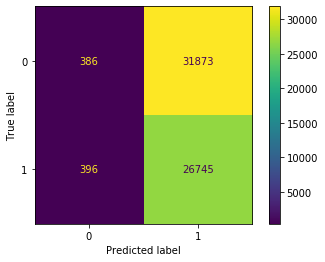

In [188]:
plot_confusion_matrix(final_model_rf, X_final_test[selected_columns], Y_final_test)
plt.savefig('./plots/final_matrix.png', bbox_inches='tight')


In [180]:
print(classification_report(Y_final_test, Y_pred))

              precision    recall  f1-score   support

           0       0.49      0.01      0.02     32259
           1       0.46      0.99      0.62     27141

    accuracy                           0.46     59400
   macro avg       0.47      0.50      0.32     59400
weighted avg       0.48      0.46      0.30     59400



After testing our model, I found out that we were great in terms of predicting our recall score for positive class and not only that we were able to minimize false negatives as you can see from the matrix. However, I can see that we were not able to minimize our false positives. But in this case, it is okay as I wanted to minimize the false negatives.  

NEXT STEPS:
Because false positives are so high, next step I want to look at is to take a look at precision since having a large false positive will lower my precision score. And also because I changed to binary classification, I would want to go back and set a different business case to present multi class classification. 